In [48]:
import pandas as pd
from tsfresh import extract_features

In [49]:
df_prep = pd.read_csv("..\chapter3\gasometry_prepared_data.csv")
cols=["BETET",	"CO2TET",	"HCO3ACTE",	"HCO3STTE",	"O2SATTET",	"O2TET", "IONH"]
my_blue="#0064B2";
my_red="#D61600";

In [50]:
df_zgon = df_prep[['PACJENT_NR', 'ZGON']].groupby('PACJENT_NR').first()

In [51]:
cols2=["BETET",	"CO2TET",	"O2TET", "IONH"]
df_miernik=df_prep[cols2]
vars1=["BETET", "O2TET"]
vars2=["IONH", "CO2TET"]

#wyliczenie wartości poza normą świadczące o zakwaszeniu organizmu
df_miernik[["BETET_neg", "O2TET_neg"]]=df_miernik[vars1].applymap(lambda x: 0 if x >= 0 else abs(x))
df_miernik[["IONH_neg", "CO2TET_neg"]]=df_miernik[vars2].applymap(lambda x: 0 if x <= 1 else x-1)
#wszystkie odchylenia od normy
df_miernik[["BETET_all", "O2TET_all"]] = df_miernik[vars1].applymap(lambda x: 0 if (x >= 0) and (x <= 1) else (abs(x) if x < 0 else x - 1))
df_miernik[["IONH_all", "CO2TET_all"]] = df_miernik[vars2].applymap(lambda x: 0 if (x >= 0) and (x <= 1) else (abs(x) if x < 0 else x - 1))
col_neg=["BETET_neg", "O2TET_neg", "CO2TET_neg", "IONH_neg"]
col_all=["BETET_all", "O2TET_all", "IONH_all", "CO2TET_all"]

df_miernik=pd.concat([df_prep[["PACJENT_NR", "BADANIE_NR", "ZGON"]], df_miernik], axis=1) 

C:\Users\dorot\AppData\Local\Temp\ipykernel_13132\3215388698.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_miernik[["BETET_neg", "O2TET_neg"]]=df_miernik[vars1].applymap(lambda x: 0 if x >= 0 else abs(x))
C:\Users\dorot\AppData\Local\Temp\ipykernel_13132\3215388698.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_miernik[["BETET_neg", "O2TET_neg"]]=df_miernik[vars1].applymap(lambda x: 0 if x >= 0 else abs(x))
C:\Users\dorot\AppData\Local\Temp\ipykernel_13132\3215388698.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [52]:
extracted_features = extract_features(df_miernik, column_id='PACJENT_NR', column_sort='BADANIE_NR', column_value="IONH_neg")
extracted_features_BE = extract_features(df_miernik, column_id='PACJENT_NR', column_sort='BADANIE_NR', column_value="BETET_neg")


Feature Extraction: 100%|██████████| 18/18 [00:06<00:00,  2.87it/s]


In [53]:
extracted_features.shape

(107, 783)

In [54]:
extracted_features_O2 = extract_features(df_miernik, column_id='PACJENT_NR', column_sort='BADANIE_NR', column_value="O2TET_neg")
extracted_features_CO2 = extract_features(df_miernik, column_id='PACJENT_NR', column_sort='BADANIE_NR', column_value="CO2TET_neg")

Feature Extraction: 100%|██████████| 18/18 [00:06<00:00,  2.83it/s]


In [55]:
extracted_features_samp=pd.concat([extracted_features[["IONH_neg__first_location_of_maximum", "IONH_neg__first_location_of_minimum", "IONH_neg__last_location_of_maximum", "IONH_neg__last_location_of_minimum", "IONH_neg__number_peaks__n_3", "IONH_neg__number_peaks__n_5", "IONH_neg__agg_linear_trend__attr_\"slope\"__chunk_len_5__f_agg_\"max\"", "IONH_neg__agg_linear_trend__attr_\"slope\"__chunk_len_5__f_agg_\"mean\""]],
                                    extracted_features_BE[["BETET_neg__first_location_of_maximum", "BETET_neg__first_location_of_minimum", "BETET_neg__last_location_of_maximum", "BETET_neg__last_location_of_minimum", "BETET_neg__number_peaks__n_3", "BETET_neg__number_peaks__n_5", "BETET_neg__agg_linear_trend__attr_\"slope\"__chunk_len_5__f_agg_\"max\"", "BETET_neg__agg_linear_trend__attr_\"slope\"__chunk_len_5__f_agg_\"mean\""]],
                                    extracted_features_O2[["O2TET_neg__first_location_of_maximum", "O2TET_neg__first_location_of_minimum", "O2TET_neg__last_location_of_maximum", "O2TET_neg__last_location_of_minimum", "O2TET_neg__number_peaks__n_3", "O2TET_neg__number_peaks__n_5", "O2TET_neg__agg_linear_trend__attr_\"slope\"__chunk_len_5__f_agg_\"max\"", "O2TET_neg__agg_linear_trend__attr_\"slope\"__chunk_len_5__f_agg_\"mean\""]],
                                    extracted_features_CO2[["CO2TET_neg__first_location_of_maximum", "CO2TET_neg__first_location_of_minimum", "CO2TET_neg__last_location_of_maximum", "CO2TET_neg__last_location_of_minimum", "CO2TET_neg__number_peaks__n_3", "CO2TET_neg__number_peaks__n_5", "CO2TET_neg__agg_linear_trend__attr_\"slope\"__chunk_len_5__f_agg_\"max\"", "CO2TET_neg__agg_linear_trend__attr_\"slope\"__chunk_len_5__f_agg_\"mean\""]]
                                    ], axis=1)

extracted_features_samp

,IONH_neg__first_location_of_maximum,IONH_neg__first_location_of_minimum,IONH_neg__last_location_of_maximum,IONH_neg__last_location_of_minimum,IONH_neg__number_peaks__n_3,IONH_neg__number_peaks__n_5,"IONH_neg__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""max""","IONH_neg__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""mean""",BETET_neg__first_location_of_maximum,BETET_neg__first_location_of_minimum,...,"O2TET_neg__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""max""","O2TET_neg__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""mean""",CO2TET_neg__first_location_of_maximum,CO2TET_neg__first_location_of_minimum,CO2TET_neg__last_location_of_maximum,CO2TET_neg__last_location_of_minimum,CO2TET_neg__number_peaks__n_3,CO2TET_neg__number_peaks__n_5,"CO2TET_neg__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""max""","CO2TET_neg__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""mean"""
1,0.020000,0.120000,0.040000,1.000000,2.0,1.0,-0.094670,-0.061885,0.000000,0.000000,...,0.006715,0.007224,0.020000,0.400000,0.040000,0.420000,4.0,1.0,-0.071512,-0.027726
2,0.000000,0.600000,0.100000,1.000000,0.0,0.0,-1.239295,-0.926254,0.000000,0.100000,...,-0.372000,-0.074400,0.200000,0.900000,0.300000,1.000000,0.0,0.0,-0.970000,-0.962000
3,0.000000,0.024390,0.024390,1.000000,0.0,0.0,-0.000544,-0.000109,0.000000,0.000000,...,-0.002733,-0.001160,0.536585,0.341463,0.560976,1.000000,6.0,3.0,-0.184500,-0.118133
4,0.823529,0.000000,0.852941,1.000000,1.0,1.0,0.036399,0.016678,0.705882,0.000000,...,0.116429,0.028536,0.823529,0.088235,0.852941,0.676471,1.0,1.0,0.228929,0.169411
6,0.000000,0.000000,1.000000,1.000000,0.0,0.0,0.000000,0.000000,0.750000,0.000000,...,-1.596000,-0.773067,0.375000,0.000000,0.500000,1.000000,1.0,0.0,-0.550000,-0.110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.031250,0.062500,0.062500,1.000000,0.0,0.0,-0.066088,-0.014062,0.000000,0.000000,...,0.039286,0.018300,0.250000,0.125000,0.406250,0.843750,3.0,0.0,-0.044643,0.056857
140,0.000000,0.041667,0.041667,1.000000,0.0,0.0,-0.250880,-0.075793,0.000000,0.041667,...,-0.002400,0.001000,0.291667,0.708333,0.333333,0.750000,2.0,1.0,-0.064000,-0.033500
142,0.809524,0.285714,0.857143,0.904762,1.0,0.0,-0.202498,-0.133243,0.000000,0.000000,...,-0.032000,-0.004560,0.809524,0.571429,0.857143,0.619048,2.0,0.0,0.280000,0.210000
144,0.000000,0.909091,0.090909,1.000000,0.0,0.0,-1.289729,-0.744192,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.090909,0.090909,0.181818,0.0,0.0,-1.180000,-0.531000


In [56]:
extracted_features_samp=extracted_features_samp.reset_index(drop=True)

In [57]:
df_zgon.shape

(107, 1)

In [66]:
extracted_features_samp.columns


Index(['IONH_neg__first_location_of_maximum',
       'IONH_neg__first_location_of_minimum',
       'IONH_neg__last_location_of_maximum',
       'IONH_neg__last_location_of_minimum', 'IONH_neg__number_peaks__n_3',
       'IONH_neg__number_peaks__n_5',
       'IONH_neg__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"max"',
       'IONH_neg__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"mean"',
       'BETET_neg__first_location_of_maximum',
       'BETET_neg__first_location_of_minimum',
       'BETET_neg__last_location_of_maximum',
       'BETET_neg__last_location_of_minimum', 'BETET_neg__number_peaks__n_3',
       'BETET_neg__number_peaks__n_5',
       'BETET_neg__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"max"',
       'BETET_neg__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"mean"',
       'O2TET_neg__first_location_of_maximum',
       'O2TET_neg__first_location_of_minimum',
       'O2TET_neg__last_location_of_maximum',
       'O2TET_neg__last_location_of_mini

In [69]:
df_zgon["ZGON"]

PACJENT_NR
1      0.0
2      0.0
3      0.0
4      0.0
6      0.0
      ... 
139    0.0
140    1.0
142    0.0
144    0.0
145    1.0
Name: ZGON, Length: 107, dtype: float64

In [58]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Dzielenie danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(extracted_features_samp, df_zgon["ZGON"], test_size=0.2, random_state=42)

# Inicjalizacja klasyfikatora drzew decyzyjnych
dt_classifier = RandomForestClassifier(random_state=42)

# Inicjalizacja RFECV z drzewem decyzyjnym jako estymatorem
rfecv = RFECV(estimator=dt_classifier, cv=5)

# Dopasowanie RFECV do danych treningowych
rfecv.fit(X_train, y_train)

# Wyświetlenie wybranych cech
print("Wybrane cechy po RFE:")
print(rfecv.support_)

# Transformacja danych treningowych i testowych, aby zawierały tylko wybrane cechy
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

# Trenowanie modelu na danych z wybranymi cechami
dt_classifier.fit(X_train_selected, y_train)

# Ocena modelu na danych testowych
accuracy = dt_classifier.score(X_test_selected, y_test)
print("Dokładność klasyfikacji na danych testowych po RFE:", accuracy)

Wybrane cechy po RFE:
[ True False False  True False False  True  True  True  True  True  True
 False False  True  True  True False False  True False False  True  True
  True False  True  True False False  True  True]
Dokładność klasyfikacji na danych testowych po RFE: 0.9545454545454546


In [68]:
extracted_features_samp.columns[rfecv.support_]

Index(['IONH_neg__first_location_of_maximum',
       'IONH_neg__last_location_of_minimum',
       'IONH_neg__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"max"',
       'IONH_neg__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"mean"',
       'BETET_neg__first_location_of_maximum',
       'BETET_neg__first_location_of_minimum',
       'BETET_neg__last_location_of_maximum',
       'BETET_neg__last_location_of_minimum',
       'BETET_neg__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"max"',
       'BETET_neg__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"mean"',
       'O2TET_neg__first_location_of_maximum',
       'O2TET_neg__last_location_of_minimum',
       'O2TET_neg__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"max"',
       'O2TET_neg__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"mean"',
       'CO2TET_neg__first_location_of_maximum',
       'CO2TET_neg__last_location_of_maximum',
       'CO2TET_neg__last_location_of_minimum',
       'CO2TET_neg_

In [67]:
# extracted_features_samp.columns[~rfecv.support_]
len(extracted_features_samp.columns[rfecv.support_])

19

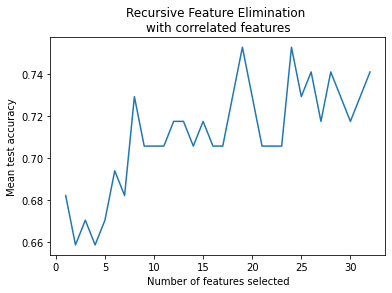

In [60]:
import matplotlib.pyplot as plt

min_features_to_select=1
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    # yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [61]:
from sklearn.metrics import classification_report

y_pred=dt_classifier.predict(X_test_selected)
report = classification_report(y_pred, y_test)

# Wyświetl raport klasyfikacji
print(report)

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        13
         1.0       1.00      0.89      0.94         9

    accuracy                           0.95        22
   macro avg       0.96      0.94      0.95        22
weighted avg       0.96      0.95      0.95        22



In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(y_pred, y_test)


array([[13,  0],
       [ 1,  8]], dtype=int64)